# Task №2:

1) Develop by yourself using numpy library (for a functions of two variables f(x,y)): 

    a) a function to implement gradient descent (GD) algorithm;
    b) Adam's optimization algorithm.

2) Come up with a function of two variables of an arbitrary form and implement the search for its minimum using functions implemented in p.1

3) Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

----


In [1]:
#Importing neccesary libraries:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar

# Array of all consecutive approximations of the solution (arg_next – arg_prev) for the part #3:
global residuals_arr
residuals_arr = []

# Maximum number of iterations:
global max_iter
max_iter = 10000

# 1.a Gradient descent algorithm:

In [45]:
def gradient_descent(func, grad_func, x0 = [0, 0], eps = 1e-5, alpha = 0.005):
    
    func_eval_num, grad_eval_num, iter_num, residuals_arr = 0, 0, 0, []
    
    args_prev = np.array(x0)
    func_prev, grad_func_prev = func(args_prev), grad_func(args_prev)

    res = minimize_scalar(lambda x: func(args_prev - x * grad_func_prev))
    
    args_curr = args_prev - np.dot(grad_func_prev, res.x)
    func_curr, grad_func_curr = func(args_curr), grad_func(args_curr)

    func_eval_num += res.nfev + 2
    grad_eval_num += 2
    iter_num += 1
    
    residual = np.linalg.norm(args_curr - args_prev, np.inf)
    residuals_arr.append(residual)
    
    while iter_num < max_iter and residual >= eps:
    #while iter_num < max_iter and abs(func_curr - func_prev) >= eps:
        
        # It is also possible to use the Barzilai–Borwein coefficient, which calculates as follows:

        alpha = np.dot(args_curr - args_prev, grad_func_curr - grad_func_prev) \
        / np.square(np.linalg.norm(grad_func_curr - grad_func_prev))
        
        args_prev = args_curr
        func_prev = func_curr
        grad_func_prev = grad_func_curr
        
        new_coef = -alpha * grad_func_prev 
        
        args_curr = args_prev + new_coef
        func_curr = func(args_curr)
        grad_func_curr = grad_func(args_curr)
        
        func_eval_num += 1
        grad_eval_num += 1
        iter_num += 1

        residual = np.linalg.norm(args_curr - args_prev, np.inf)
        residuals_arr.append(residual)
        
    n_digits = abs(int(round(np.log10(eps))))

    return np.array([round(args_curr[0], n_digits), round(args_curr[1], n_digits), \
                     func_eval_num, grad_eval_num, iter_num, residuals_arr])


# TESTING ---------------------------------------------------------------------------------------
def test_func(arg):
    return (arg[0] - 1) ** 2 + (arg[1] + 1) ** 2

def grad_test_func(arg):
    return np.array([2 * (arg[0] - 1), 2 * (arg[1] + 1)])

x, y, _, _, _, _ = gradient_descent(test_func, grad_test_func)
print('minimum reaches at the point: ', [x, y])

minimum reaches at the point:  [1.0, -1.0]


# 1.b Adam optimization algorithm:

In [46]:
def adam_gradient_descent(func, grad_func, x0 = [0, 0], eps = 1e-5, alpha = 0.05, beta_1 = 0.8, beta_2 = 0.999):
    
    func_eval_num, grad_eval_num, iter_num, residuals_arr = 0, 0, 0, []
    
    args_prev = np.array(x0)
    func_prev, grad_func_prev = func(args_prev), grad_func(args_prev)

    res = minimize_scalar(lambda x: func(args_prev - x * grad_func_prev))
    
    args_curr = args_prev - np.dot(grad_func_prev, res.x)
    func_curr, grad_func_curr = func(args_curr), grad_func(args_curr)
    
    func_eval_num += res.nfev + 2
    grad_eval_num += 2
    iter_num += 1
    
    residual = np.linalg.norm(args_curr - args_prev, np.inf)
    residuals_arr.append(residual)
    m, v = np.zeros(2), np.zeros(2)
    
    while iter_num < max_iter and residual >= eps:
    #while iter_num < max_iter and abs(func_curr - func_prev) >= eps:
   
        args_prev = args_curr
        func_prev = func_curr
        grad_func_prev = grad_func_curr
        
        m = beta_1 * m + (1. - beta_1) * grad_func_prev
        v = beta_2 * v + (1. - beta_2) * pow(grad_func_prev, 2)

        m_hat = m / (1. - pow(beta_1, iter_num))
        v_hat = v / (1. - pow(beta_2, iter_num))
    
        new_coef = - alpha * m_hat / (np.sqrt(v_hat) - eps) 
        
        args_curr = args_prev + new_coef
        func_curr = func(args_curr)
        grad_func_curr = grad_func(args_curr)
        
        func_eval_num += 1
        grad_eval_num += 1
        iter_num += 1
        
        residual = np.linalg.norm(args_curr - args_prev, np.inf)
        residuals_arr.append(residual)
    
    n_digits = abs(int(round(np.log10(eps))))

    return np.array([round(args_curr[0], n_digits), round(args_curr[1], n_digits), func_eval_num, grad_eval_num, iter_num, residuals_arr])


# TESTING ---------------------------------------------------------------------------------------

def test_func(arg):
    return (arg[0] - 1) ** 2 + (arg[1] + 1) ** 2

def grad_test_func(arg):
    return np.array([2 * (arg[0] - 1), 2 * (arg[1] + 1)])

x, y, _, _, _, _ = adam_gradient_descent(test_func, grad_test_func, eps = 1e-5)
print('minimum reaches at the point: ', [x, y])

minimum reaches at the point:  [1.0, -1.0]


# 2. Inventing a function of two variables and implementing the search of it's minimum:

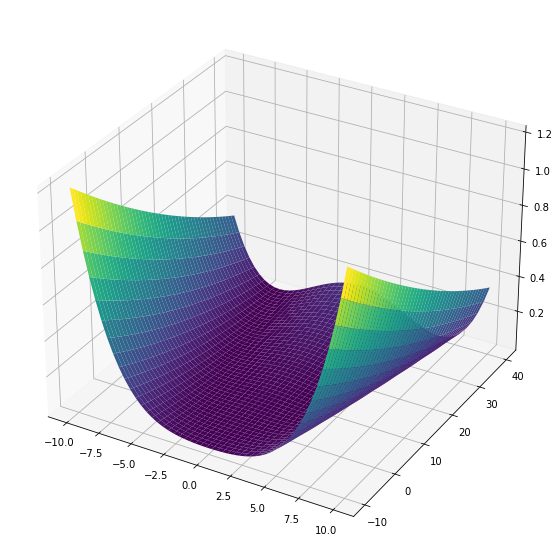

for calculations with an error eps = 10^-10 and initial approx x0 = [0, 0]:

minimum by the scipy.optimize.minimize:  [0.9999955222, 0.999991037]
number of iterations: 21, number of func evaluations: 348, number of grad evaluations: 84

minimum by the gradient descent method:  [0.9999999966, 0.9999999931]
number of iterations: 214, number of func evaluations: 236, number of grad evaluations: 215

minimum by the ADAM optimization method:  [1.0000000013, 1.0000000027]
number of iterations: 187, number of func evaluations: 209, number of grad evaluations: 188



In [48]:
# I took the Rosenbrock function as a test-function:

def test_func(arg):
    return (1 - arg[0]) ** 2 + 100 * (arg[1] - arg[0] ** 2) ** 2

def grad_test_func(arg):
    return np.array([2 * (arg[0] - 1), 200 * (arg[1] - arg[0] ** 2)])


# Visualization of the invented function:
x, y = np.linspace(-10, 10), np.linspace(-10, 40)
X, Y = np.meshgrid(x, y) 
Z = test_func([X, Y]) 
 
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d') 
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis')
plt.show()


# Here is the value of epsilon:
lg_eps, init_approx = 10, [0, 0]
print('for calculations with an error eps = 10^-{} and initial approx x0 = {}:\n'.format(lg_eps, init_approx))


# Finding the minimum with built-in python tools (I guess it's a QuasiNewtonic method, like BFGS)
res = minimize(test_func, x0 = init_approx, options = {'gtol': 10 ** (-lg_eps), 'disp': False})
print('minimum by the scipy.optimize.minimize: ', [round(coord, lg_eps) for coord in res.x])
print('number of iterations: {}, number of func evaluations: {}, number of grad evaluations: {}\n'.format(res.nit, \
                                                                                                          res.nfev, res.njev))


# Finding the minimum with gradient descent method:
x, y, nfev, njev, nit_gd, res_gd = gradient_descent(test_func, grad_test_func, x0 = init_approx, eps = 10 ** (-lg_eps))
print('minimum by the gradient descent method: ', [x, y])
print('number of iterations: {}, number of func evaluations: {}, number of grad evaluations: {}\n'.format(nit_gd, nfev, njev))


# Finding the minimum with ADAM's optimization method:
x, y, nfev, njev, nit_adam, res_adam = adam_gradient_descent(test_func, grad_test_func, x0 = init_approx, eps = 10 ** (-lg_eps))
print("minimum by the ADAM optimization method: ", [x, y])
print('number of iterations: {}, number of func evaluations: {}, number of grad evaluations: {}\n'.format(nit_adam, nfev, njev))

The inaccuracy of the solution can be explained by the fact that the maximum of the differences in the values of the previous and current coordinates was used as a stop criterion. 

Similarly, it would be possible to put a condition on the difference between the values of the function at neighboring points.

# 3. Illustration of the process of finding an extremum:

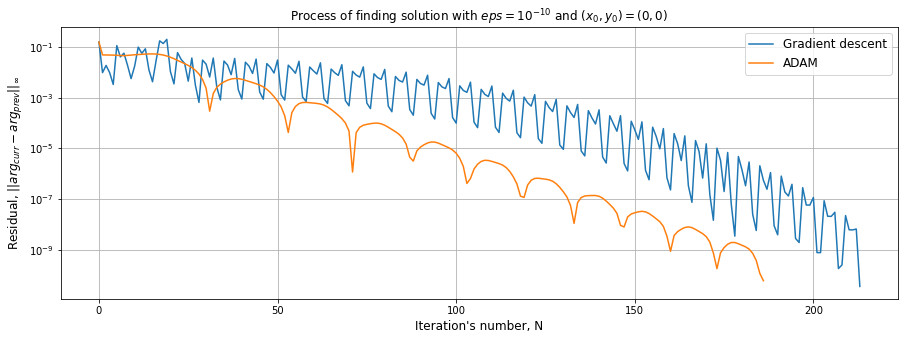

In [49]:
fig, ax = plt.subplots(figsize = (15, 5))

ax.set_yscale('log')
ax.plot([i for i in range(nit_gd)], res_gd, label = 'Gradient descent')
ax.plot([i for i in range(nit_adam)], res_adam, label = 'ADAM')

ax.set_title('Process of finding solution with $eps = 10^{-10}$ and $(x_0, y_0) = (0, 0)$')
ax.set_xlabel("Iteration's number, N", fontsize = 12)
ax.set_ylabel("Residual, $||arg_{curr} - arg_{prev}||_\infty$", fontsize = 12)
ax.legend(fontsize = 12)
ax.grid()
